**a. What is the probability of the word “data” occurring in each line ?**

In [1]:
# import libraries

import re
import pandas as pd
import nltk
nltk.download('punkt')
import matplotlib.pyplot as plt
from scipy.stats import norm
import operator
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# load data

string = "As a term, data analytics predominantly refers to an assortment of applications, from basic business intelligence (BI), reporting and online analytical processing (OLAP) to various forms of advanced analytics. In that sense, it's similar in nature to business analytics, another umbrella term for approaches to analyzing data -- with the difference that the latter is oriented to business uses, while data analytics has a broader focus. The expansive view of the term isn't universal, though: In some cases, people use data analytics specifically to mean advanced analytics, treating BI as a separate category. Data analytics initiatives can help businesses increase revenues, improve operational efficiency, optimize marketing campaigns and customer service efforts, respond more quickly to emerging market trends and gain a competitive edge over rivals -- all with the ultimate goal of boosting business performance. Depending on the particular application, the data that's analyzed can consist of either historical records or new information that has been processed for real-time analytics uses. In addition, it can come from a mix of internal systems and external data sources. At a high level, data analytics methodologies include exploratory data analysis (EDA), which aims to find patterns and relationships in data, and confirmatory data analysis (CDA), which applies statistical techniques to determine whether hypotheses about a data set are true or false. EDA is often compared to detective work, while CDA is akin to the work of a judge or jury during a court trial -- a distinction first drawn by statistician John W. Tukey in his 1977 book Exploratory Data Analysis. Data analytics can also be separated into quantitative data analysis and qualitative data analysis. The former involves analysis of numerical data with quantifiable variables that can be compared or measured statistically. The qualitative approach is more interpretive -- it focuses on understanding the content of non-numerical data like text, images, audio and video, including common phrases, themes and points of view."
print(string)

As a term, data analytics predominantly refers to an assortment of applications, from basic business intelligence (BI), reporting and online analytical processing (OLAP) to various forms of advanced analytics. In that sense, it's similar in nature to business analytics, another umbrella term for approaches to analyzing data -- with the difference that the latter is oriented to business uses, while data analytics has a broader focus. The expansive view of the term isn't universal, though: In some cases, people use data analytics specifically to mean advanced analytics, treating BI as a separate category. Data analytics initiatives can help businesses increase revenues, improve operational efficiency, optimize marketing campaigns and customer service efforts, respond more quickly to emerging market trends and gain a competitive edge over rivals -- all with the ultimate goal of boosting business performance. Depending on the particular application, the data that's analyzed can consist of 

In [3]:
# clean data

# change string to lower case
string_low = string.lower()

# change paragraph to each line
string_split = sent_tokenize(string_low)

string_split

['as a term, data analytics predominantly refers to an assortment of applications, from basic business intelligence (bi), reporting and online analytical processing (olap) to various forms of advanced analytics.',
 "in that sense, it's similar in nature to business analytics, another umbrella term for approaches to analyzing data -- with the difference that the latter is oriented to business uses, while data analytics has a broader focus.",
 "the expansive view of the term isn't universal, though: in some cases, people use data analytics specifically to mean advanced analytics, treating bi as a separate category.",
 'data analytics initiatives can help businesses increase revenues, improve operational efficiency, optimize marketing campaigns and customer service efforts, respond more quickly to emerging market trends and gain a competitive edge over rivals -- all with the ultimate goal of boosting business performance.',
 "depending on the particular application, the data that's analyz

In [4]:
# find data word count in each line

arr_data = []

for i in range(len(string_split)):
  data_count = string_split[i].count("data")
  arr_data.append(data_count)

arr_data

[1, 2, 1, 1, 1, 1, 5, 1, 3, 1, 1]

In [5]:
# find total word count in each line

arr_sum = []

for i in range(len(string_split)):
  arr_sum.append(len(string_split[i].split()))

arr_sum

[29, 37, 27, 42, 26, 15, 42, 40, 14, 17, 30]

In [6]:
# find probability of data word in each line

arr_prob_data = []
for i in range(len(string_split)):
  prob_data = arr_data[i]/arr_sum[i]
  arr_prob_data.append(round(prob_data, 3))

arr_prob_data

[0.034, 0.054, 0.037, 0.024, 0.038, 0.067, 0.119, 0.025, 0.214, 0.059, 0.033]

In [7]:
print("Average probability of the word 'data' occurring in each line is", sum(arr_prob_data)/len(arr_prob_data))

Average probability of the word 'data' occurring in each line is 0.064


**b. What is the distribution of distinct word counts across all the lines ?**

In [8]:
df_unique_words = pd.DataFrame(arr_sum)
df_unique_words = df_unique_words.rename(columns={0: "Unique_Words"})
df_unique_words

,Unique_Words
0,29
1,37
2,27
3,42
4,26
5,15
6,42
7,40
8,14
9,17


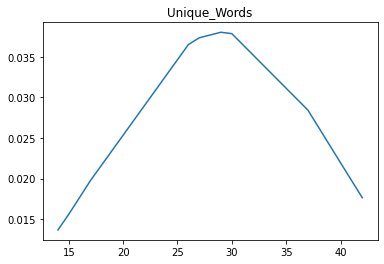

In [9]:
df = df_unique_words.copy()
mean = df.mean()
std = df.std()
pdf = norm.pdf(df["Unique_Words"].sort_values(), mean, std)
plt.plot(df["Unique_Words"].sort_values(), pdf)
plt.title("Unique_Words")
plt.show()

*This is normally distributed.*

**c. What is the probability of the word “analytics” occurring after the word “data” ?**

In [10]:
# cleaning data

# remove punctuation
new_string = re.sub(r'[^\w\s]', '', string_low)

new_string

'as a term data analytics predominantly refers to an assortment of applications from basic business intelligence bi reporting and online analytical processing olap to various forms of advanced analytics in that sense its similar in nature to business analytics another umbrella term for approaches to analyzing data  with the difference that the latter is oriented to business uses while data analytics has a broader focus the expansive view of the term isnt universal though in some cases people use data analytics specifically to mean advanced analytics treating bi as a separate category data analytics initiatives can help businesses increase revenues improve operational efficiency optimize marketing campaigns and customer service efforts respond more quickly to emerging market trends and gain a competitive edge over rivals  all with the ultimate goal of boosting business performance depending on the particular application the data thats analyzed can consist of either historical records or

In [11]:
# display bigram and their count

tokens = word_tokenize(new_string)
bigrams = nltk.bigrams(tokens)
frequence = nltk.FreqDist(bigrams)
sorte = dict(sorted(frequence.items(), key=operator.itemgetter(1),reverse=True))
for key,value in sorte.items():
    print(key,value)

('data', 'analytics') 6
('data', 'analysis') 5
('as', 'a') 2
('advanced', 'analytics') 2
('to', 'business') 2
('data', 'with') 2
('with', 'the') 2
('exploratory', 'data') 2
('a', 'term') 1
('term', 'data') 1
('analytics', 'predominantly') 1
('predominantly', 'refers') 1
('refers', 'to') 1
('to', 'an') 1
('an', 'assortment') 1
('assortment', 'of') 1
('of', 'applications') 1
('applications', 'from') 1
('from', 'basic') 1
('basic', 'business') 1
('business', 'intelligence') 1
('intelligence', 'bi') 1
('bi', 'reporting') 1
('reporting', 'and') 1
('and', 'online') 1
('online', 'analytical') 1
('analytical', 'processing') 1
('processing', 'olap') 1
('olap', 'to') 1
('to', 'various') 1
('various', 'forms') 1
('forms', 'of') 1
('of', 'advanced') 1
('analytics', 'in') 1
('in', 'that') 1
('that', 'sense') 1
('sense', 'its') 1
('its', 'similar') 1
('similar', 'in') 1
('in', 'nature') 1
('nature', 'to') 1
('business', 'analytics') 1
('analytics', 'another') 1
('another', 'umbrella') 1
('umbrella',

In [12]:
sum(sorte.values())

314

In [13]:
print("Probability of the word 'analytics' occurring after the word 'data' is", round(sorte['data', 'analytics']/sum(sorte.values()), 3))

Probability of the word 'analytics' occurring after the word 'data' is 0.019
